In [5]:
import os
import glob
import pandas as pd
import pandasql
import matplotlib.pyplot as plt
import numpy as np
from collections import namedtuple 

100
357
-238
hello


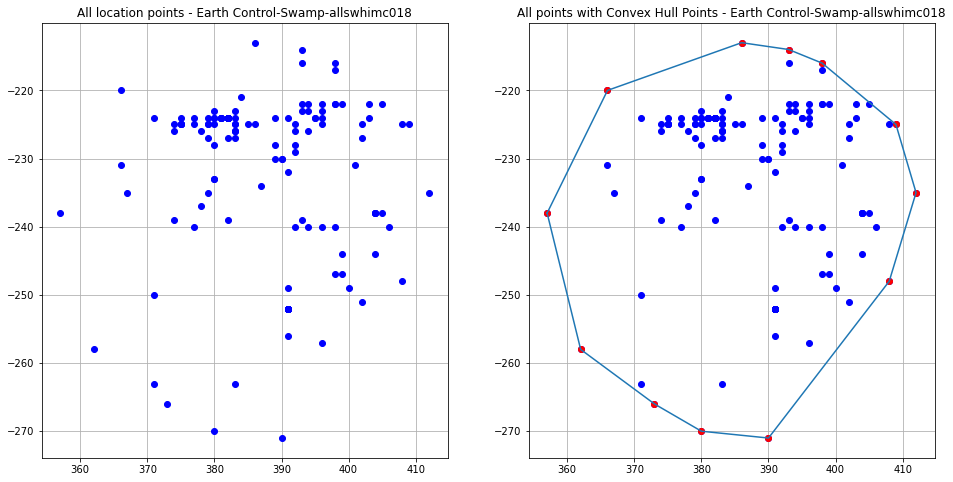

In [13]:
def Left_index(points):
    left = 0
    for i in range(1,len(points)):
        if points[i].x < points[left].x:
            left = i
        elif points[i].x == points[left].x:
            if points[i].z > points[left].z:
                left = i
    return left

def orientation(p, q, r):

    val = (q.z - p.z) * (r.x - q.x) - (q.x - p.x) * (r.z - q.z)
 
    if val == 0:
        return 0
    elif val > 0:
        return 1
    else:
        return 2


def convexHull(points):
    if len(points) < 3:
        return
    
    # Find the leftmost point
    l = Left_index(points)
    print (l)
    print (points[l].x)
    print (points[l].z)

    hull_index = []

    p = l
    q = 0
    while(True):
         
        hull_index.append(p)

        q = (p + 1) % len(points)
 
        for i in range(len(points)):
            if(orientation(points[p],
                           points[i], points[q]) == 2):
                q = i
 
        p = q
 
        if(p == l):
            break
 
    hull_points = []
    for i in hull_index:
        hull_points.append(Point(points[i].x,points[i].z))

    return hull_points

chull = []
chull = convexHull(points)

#compare plot of all points to plot with convex hull
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

ax[0].plot(df_user1.x,df_user1.z, 'bo', linestyle='None')
ax[0].set_title('All location points - Earth Control-Swamp-allswhimc018')
ax[0].grid(True)

for i in range (0, len(points)):
    ax[1].plot(points[i].x,points[i].z, 'bo', linestyle='None')

chull_x_values = []
chull_z_values = []
for i in range (0, len(chull)):
    ax[1].plot(chull[i].x,chull[i].z, 'ro', linestyle='None')
    chull_x_values.append(chull[i].x)
    chull_z_values.append(chull[i].z)

chull_x_values.append(chull[0].x)
chull_z_values.append(chull[0].z)
ax[1].plot(chull_x_values, chull_z_values)
ax[1].set_title('All points with Convex Hull Points - Earth Control-Swamp-allswhimc018')
ax[1].grid(True)